# Exploratory Data Analysis
Inspect the raw MovieLens dataset: ratings distribution, genre breakdown, user activity, and temporal trends.

In [1]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.data.loader import load_dataset

ds = load_dataset(ROOT / 'data' / 'raw', max_rows=500_000)
ratings, movies = ds.ratings, ds.movies
print(f'Ratings : {len(ratings):,}  |  Movies: {len(movies):,}  |  Users: {ratings["userId"].nunique():,}')

Ratings : 500,000  |  Movies: 87,585  |  Users: 3,238


In [2]:
import pandas as pd
ratings.describe()

,userId,movieId,rating,timestamp
count,500000.000000,500000.000000,500000.000000,5.000000e+05
mean,1624.895570,29157.813884,3.552823,1.281803e+09
std,949.478219,50302.776085,1.064429,2.570989e+08
min,1.000000,1.000000,0.500000,8.254917e+08
25%,798.000000,1240.000000,3.000000,1.058597e+09
50%,1629.000000,3508.000000,4.000000,1.276167e+09
75%,2469.000000,44694.000000,4.000000,1.506214e+09
max,3238.000000,292057.000000,5.000000,1.697148e+09


C:\Users\DELL\AppData\Local\Temp\ipykernel_13232\2789117498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, ax=axes[0], palette='Blues_d')


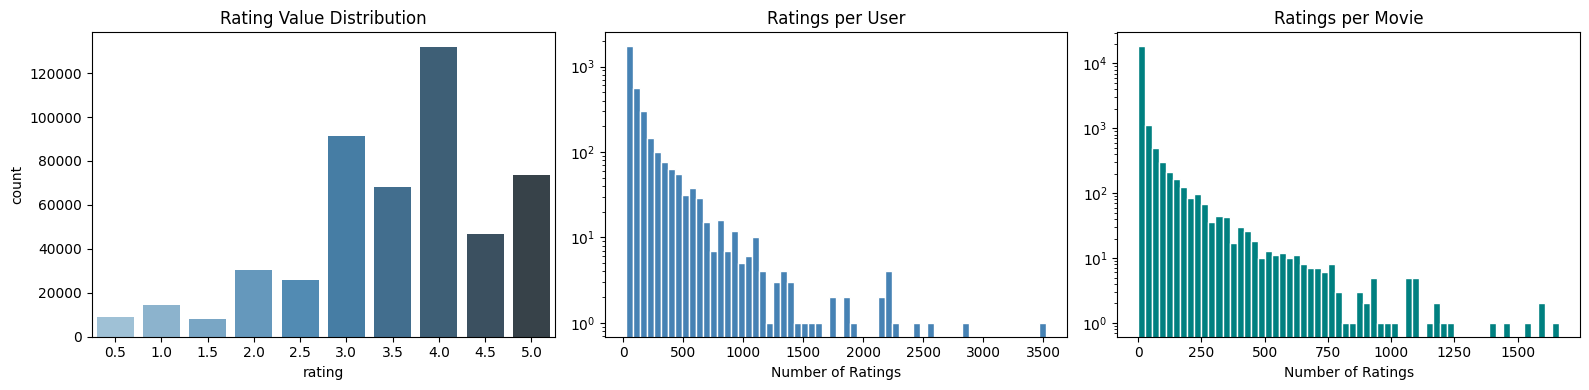

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Rating value distribution
sns.countplot(x='rating', data=ratings, ax=axes[0], palette='Blues_d')
axes[0].set_title('Rating Value Distribution')

# Ratings per user (log scale)
user_counts = ratings.groupby('userId').size()
axes[1].hist(user_counts, bins=60, color='steelblue', edgecolor='white')
axes[1].set_title('Ratings per User')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_yscale('log')

# Ratings per movie (log scale)
movie_counts = ratings.groupby('movieId').size()
axes[2].hist(movie_counts, bins=60, color='teal', edgecolor='white')
axes[2].set_title('Ratings per Movie')
axes[2].set_xlabel('Number of Ratings')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

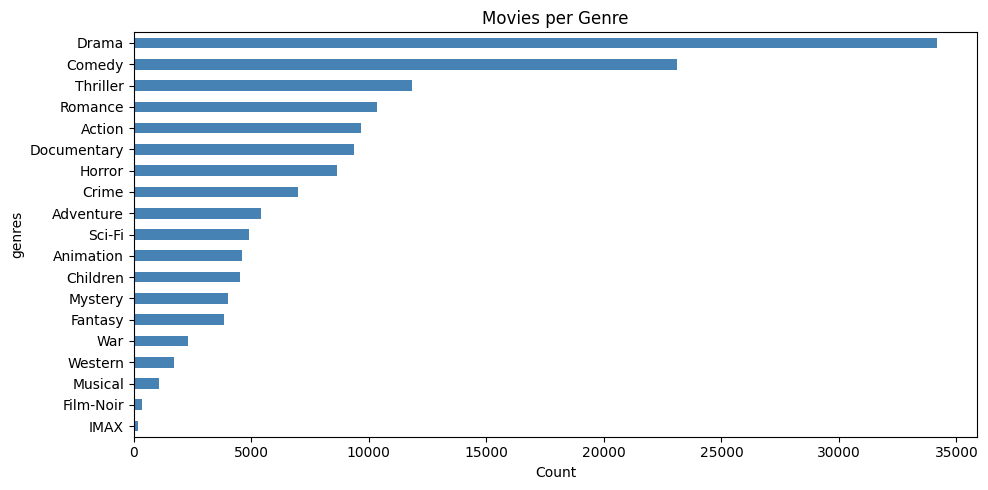

In [4]:
# Genre frequency
genre_series = movies['genres'].str.split('|').explode()
genre_counts = genre_series.value_counts().drop('(no genres listed)', errors='ignore')

fig, ax = plt.subplots(figsize=(10, 5))
genre_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Movies per Genre')
ax.set_xlabel('Count')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

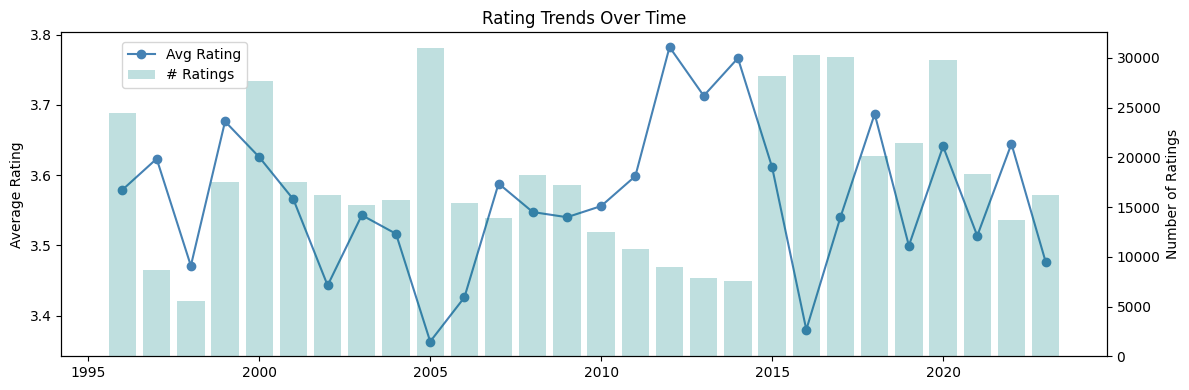

In [5]:
# Temporal trend — average rating by year
ratings['year'] = ratings['rating_date'].dt.year
yearly = ratings.groupby('year').agg(avg_rating=('rating', 'mean'), count=('rating', 'size')).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()
ax1.plot(yearly['year'], yearly['avg_rating'], marker='o', color='steelblue', label='Avg Rating')
ax2.bar(yearly['year'], yearly['count'], alpha=0.25, color='teal', label='# Ratings')
ax1.set_title('Rating Trends Over Time')
ax1.set_ylabel('Average Rating')
ax2.set_ylabel('Number of Ratings')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()